# Table of Contents

#### Analysis 1: Determining the relationship of a city's population to registered deaths
#### Analysis 2: Determining Health Impacts due to oil spills by city
#### Analysis 3: Determining the % of Social Assistance Offered compared to a city's population

In [287]:
#Dependies
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy import stats


In [288]:
#Import Cleaned up Data Files

population_file = "../Project/Resources/Cleaned_Data/Ont_Population.csv"

registered_death_file        = "../Project/Resources/Cleaned_Data/Death_Registration.csv"
social_assistance_file       = "../Project/Resources/Cleaned_Data/Social_Assistance_Programs.csv"
infrastructure_projects_file = "../Project/Resources/Cleaned_Data/Infrastructure_Projects.csv"
university_file              = "../Project/Resources/Cleaned_Data/University_Enrollment.csv"
environment_spills_file      = "../Project/Resources/Cleaned_Data/Environmental_Spills.csv"
air_emission_file            = "../Project/Resources/Cleaned_Data/Air_Emission_Non_Compliant_Facilities.csv"


In [289]:
#Read the Data Files with Pandas

population_df = pd.read_csv(population_file)

registered_death_df        = pd.read_csv(registered_death_file)
social_assistance_df       = pd.read_csv(social_assistance_file)
infrastructure_projects_df = pd.read_csv(infrastructure_projects_file)
university_df              = pd.read_csv(university_file)
environment_spills_df      = pd.read_csv(environment_spills_file)
air_emission_df            = pd.read_csv(air_emission_file)

# Analysis 1: Determining the relationship of a city's population to registered deaths

In [290]:
#Merge file and get the Percentage

death_analysis = pd.merge(population_df, registered_death_df, on='City')

death_percent = ((death_analysis['Total Deaths Registered']) / (death_analysis['Total Population'])) * 100

death_analysis['Percent of Death Registered Compared to Population'] = round(death_percent, 2)

death_analysis.head()


,Unnamed: 0,City,Total Population,Land area (km2)[2],Total Deaths Registered,Percent of Death Registered Compared to Population
0,0,TORONTO,5647656,"1,829.05",22131,0.39
1,1,OTTAWA,1068821,549.49,7706,0.72
2,2,HAMILTON,729560,356.03,5854,0.80
3,3,KITCHENER,522888,296.45,2453,0.47
4,4,LONDON,423369,244.97,4340,1.03


The r-squared is: 0.9435949544550479


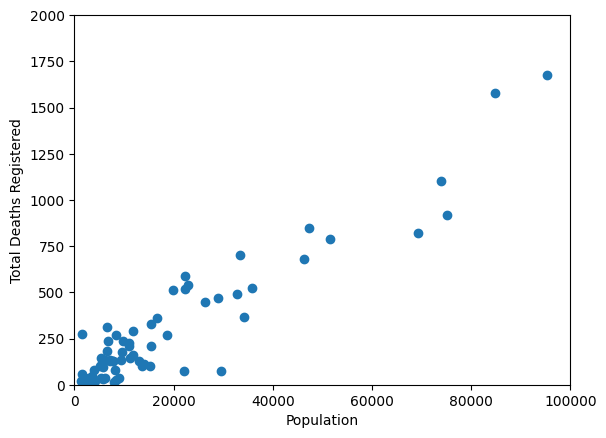

In [291]:
#Creating the Scatter Plot Graph
x_values = death_analysis['Total Population']
y_values = death_analysis['Total Deaths Registered']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

plt.scatter(x_values,y_values)

#labels
plt.xlabel("Population")
plt.ylabel("Total Deaths Registered")

# x_limits
plt.xlim(0, 100000)

# y_limits
plt.ylim(0, 2000)

print(f"The r-squared is: {rvalue**2}")

plt.show()

In [292]:
#Sort by Lowest 
lowest_death = death_analysis.sort_values(by=["Total Deaths Registered"], inplace=True)

lowest_death = death_analysis

lowest_death

,Unnamed: 0,City,Total Population,Land area (km2)[2],Total Deaths Registered,Percent of Death Registered Compared to Population
73,166,MARATHON,3022,4.33,7,0.23
52,89,AYLMER,7975,7.2,13,0.16
76,207,ATIKOKAN,1929,2.37,16,0.83
68,140,PRESCOTT,4078,4.02,20,0.49
80,266,POWASSAN,1241,1.68,22,1.77
...,...,...,...,...,...,...
6,6,WINDSOR,306519,184.96,2984,0.97
4,4,LONDON,423369,244.97,4340,1.03
2,2,HAMILTON,729560,356.03,5854,0.80
1,1,OTTAWA,1068821,549.49,7706,0.72


# Analysis 2: Determining Health Impacts due to oil spills by city

In [293]:
#Merge file and get the Percentage

spills_analysis = pd.merge(population_df, environment_spills_df, on='City')

spills_percent = ((spills_analysis['# of Health Impacts due to spills']) / (spills_analysis['Total Population'])) * 100

spills_analysis['Percent of Health Impacted by Oil Spills Compared to Population'] = spills_percent

spills_analysis.head()

,Unnamed: 0,City,Total Population,Land area (km2)[2],# of Health Impacts due to spills,Percent of Health Impacted by Oil Spills Compared to Population
0,0,TORONTO,5647656,"1,829.05",43,0.000761
1,1,OTTAWA,1068821,549.49,15,0.001403
2,2,HAMILTON,729560,356.03,13,0.001782
3,3,KITCHENER,522888,296.45,4,0.000765
4,4,LONDON,423369,244.97,13,0.003071


The r-squared is: 0.877245857535585


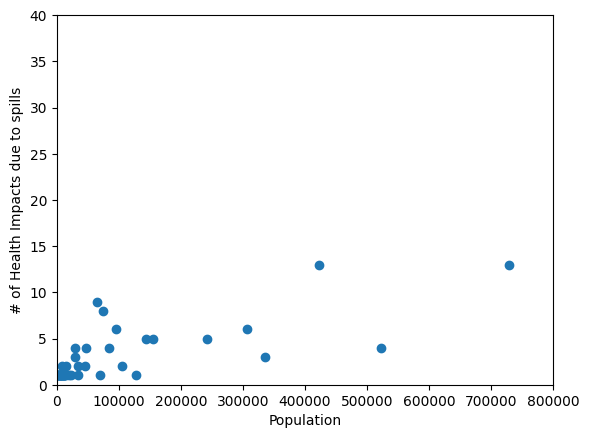

In [294]:
x_values = spills_analysis['Total Population']
y_values = spills_analysis['# of Health Impacts due to spills']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

plt.scatter(x_values,y_values)

plt.xlabel("Population")
plt.ylabel("# of Health Impacts due to spills")

plt.xlim(0, 800000)

plt.ylim(0, 40)

print(f"The r-squared is: {rvalue**2}")

plt.show()

In [295]:
#Sort by Highest Percentage

highest = spills_analysis.sort_values(by=["# of Health Impacts due to spills"], ascending=False, inplace=True)

highest = spills_analysis.head(5)

highest

,Unnamed: 0,City,Total Population,Land area (km2)[2],# of Health Impacts due to spills,Percent of Health Impacted by Oil Spills Compared to Population
0,0,TORONTO,5647656,"1,829.05",43,0.000761
1,1,OTTAWA,1068821,549.49,15,0.001403
2,2,HAMILTON,729560,356.03,13,0.001782
4,4,LONDON,423369,244.97,13,0.003071
16,20,SAULT STE. MARIE,64923,52.97,9,0.013863


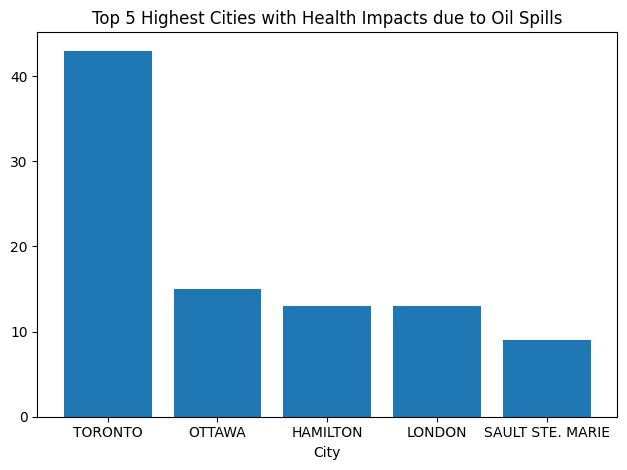

In [296]:
graph_index = highest[['City', "# of Health Impacts due to spills"]]

plt.bar(highest['City'], highest['# of Health Impacts due to spills'])

plt.title("Top 5 Highest Cities with Health Impacts due to Oil Spills")
plt.xlabel("City")
plt.tight_layout()
plt.show()


In [297]:
#Sort by Lowest Percentage

lowest = spills_analysis.sort_values(by=["# of Health Impacts due to spills"], inplace=True)

lowest = spills_analysis.head(5)

lowest

,Unnamed: 0,City,Total Population,Land area (km2)[2],# of Health Impacts due to spills,Percent of Health Impacted by Oil Spills Compared to Population
35,87,ESSEX,8233,5.56,1,0.012146
46,264,RED LAKE,1263,1.54,1,0.079177
42,140,PRESCOTT,4078,4.02,1,0.024522
41,120,DRYDEN,5355,6.53,1,0.018674
40,113,GRAVENHURST,5789,6.32,1,0.017274


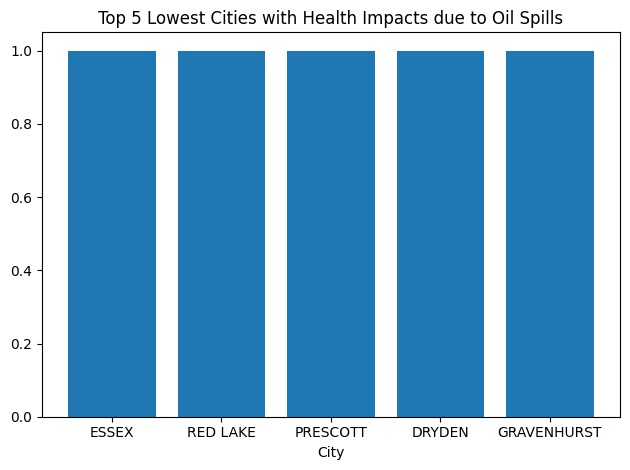

In [298]:
graph_index = lowest[['City', "# of Health Impacts due to spills"]]

plt.bar(lowest['City'], lowest['# of Health Impacts due to spills'])

plt.title("Top 5 Lowest Cities with Health Impacts due to Oil Spills")
plt.xlabel("City")
plt.tight_layout()
plt.show()

# Analysis 3: Determining the % of Social Assistance Offered compared to a city's population

In [299]:
#Merge file and get the Percentage

social_assistance_analysis = pd.merge(population_df, social_assistance_df, on='City')

social_percent = ((social_assistance_analysis['Social Assistance Programs Offered']) / (social_assistance_analysis['Total Population']))*100

social_assistance_analysis['Percent of Social Assistance Offered Compared to Population'] = social_percent
social_assistance_analysis.head()

,Unnamed: 0,City,Total Population,Land area (km2)[2],Social Assistance Programs Offered,Percent of Social Assistance Offered Compared to Population
0,0,TORONTO,5647656,"1,829.05",478098,8.465424
1,1,OTTAWA,1068821,549.49,102353,9.576253
2,2,HAMILTON,729560,356.03,91394,12.527277
3,3,KITCHENER,522888,296.45,49598,9.485396
4,4,LONDON,423369,244.97,69240,16.354528


The r-squared is: 0.2136106044351686


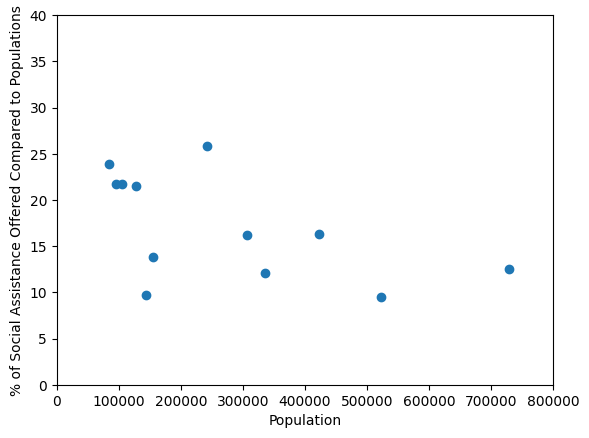

In [300]:
x_values = social_assistance_analysis['Total Population']
y_values = social_assistance_analysis['Percent of Social Assistance Offered Compared to Population']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

plt.scatter(x_values,y_values)

plt.xlabel("Population")
plt.ylabel("% of Social Assistance Offered Compared to Populations")

plt.xlim(0, 800000)

plt.ylim(0, 40)

print(f"The r-squared is: {rvalue**2}")

plt.show()

In [301]:
#Sort by Highest Percentage

highest = social_assistance_analysis.sort_values(by=["Percent of Social Assistance Offered Compared to Population"], ascending=False, inplace=True)

highest = social_assistance_analysis.head(5)

highest

,Unnamed: 0,City,Total Population,Land area (km2)[2],Social Assistance Programs Offered,Percent of Social Assistance Offered Compared to Population
7,7,ST. CATHARINES,242460,140.59,62570,25.806319
13,16,PETERBOROUGH,84793,54.58,20225,23.852205
11,13,BRANTFORD,104413,62.13,22672,21.713771
12,14,THUNDER BAY,95266,76.03,20659,21.685596
10,11,KINGSTON,127943,83.43,27577,21.554130


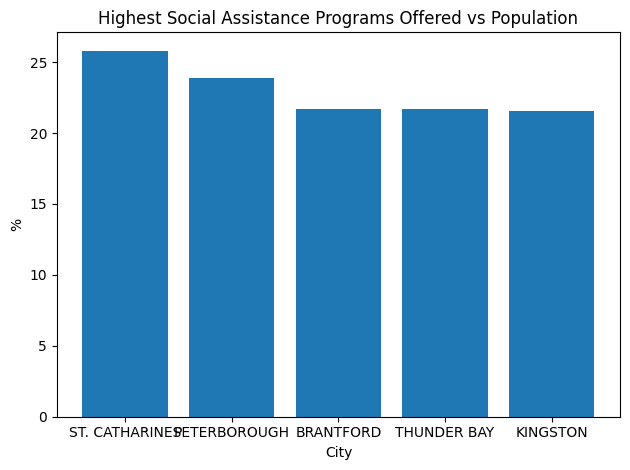

In [302]:
graph_index = highest[['City', "Percent of Social Assistance Offered Compared to Population"]]

plt.bar(highest['City'], highest['Percent of Social Assistance Offered Compared to Population'])

plt.title("Highest Social Assistance Programs Offered vs Population")
plt.xlabel("City")
plt.ylabel("%")
plt.tight_layout()
plt.show()

In [303]:
#Sort by Lowest Percentage

lowest = social_assistance_analysis.sort_values(by=["Percent of Social Assistance Offered Compared to Population"], inplace=True)

lowest = social_assistance_analysis.head(5)

lowest

,Unnamed: 0,City,Total Population,Land area (km2)[2],Social Assistance Programs Offered,Percent of Social Assistance Offered Compared to Population
0,0,TORONTO,5647656,"1,829.05",478098,8.465424
3,3,KITCHENER,522888,296.45,49598,9.485396
1,1,OTTAWA,1068821,549.49,102353,9.576253
9,9,GUELPH,144356,79.57,14088,9.759206
5,5,OSHAWA,335949,159.79,40624,12.092312


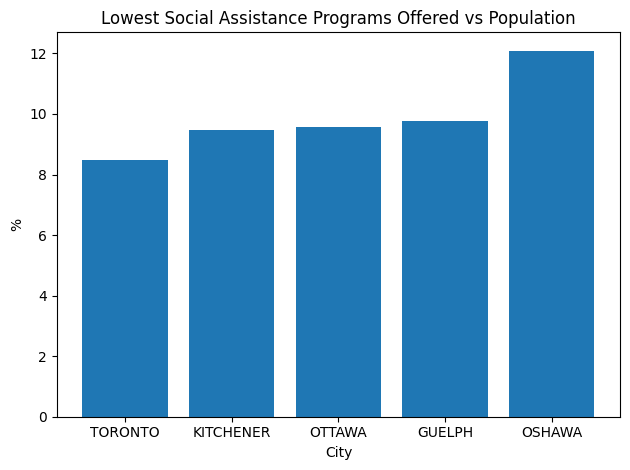

In [304]:
graph_index = lowest[['City', "Percent of Social Assistance Offered Compared to Population"]]

plt.bar(lowest['City'], lowest['Percent of Social Assistance Offered Compared to Population'])

plt.title("Lowest Social Assistance Programs Offered vs Population")
plt.xlabel("City")
plt.ylabel("%")
plt.tight_layout()
plt.show()